## Summative Lab: Forest Fires Prevention

### Step 1: Load the Dataset

*   Install and import the ucimlrepo library.
*   Load the Forest Fires dataset:
 *   Predictors: Features from forest_fires.data.features.
 *   Target: forest_fires.data.targets.

In [1]:
# Run pip install if necessary to access the UCI ML Repository (uncomment the next line)
! pip install ucimlrepo

In [2]:
# Data
from ucimlrepo import fetch_ucirepo


forest_fires = fetch_ucirepo(id=162)
X = forest_fires.data.features
y = forest_fires.data.targets


# Display dataset structure
print(X.info())
print(X.describe())
print(y.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
dtypes: float64(7), int64(3), object(2)
memory usage: 48.6+ KB
None
                X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900    5.520111   64.046482  248.066192 

### Step 2: EDA

* Examine the dataset structure and summary statistics.
* Analyze correlations between predictors and the target variable.
* Plot scatterplots for key predictors vs. the target.
* Generate a residual plot to check for randomness in residuals.

In [3]:
! pip install scikit-learn seaborn

Shape: (517, 13)

Missing values per column:
 X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517,517,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
unique,NaN,NaN,12,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,aug,sun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,184,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.669246,4.299807,NaN,NaN,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,NaN,NaN,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,NaN,NaN,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,NaN,NaN,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,NaN,NaN,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,NaN,NaN,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000


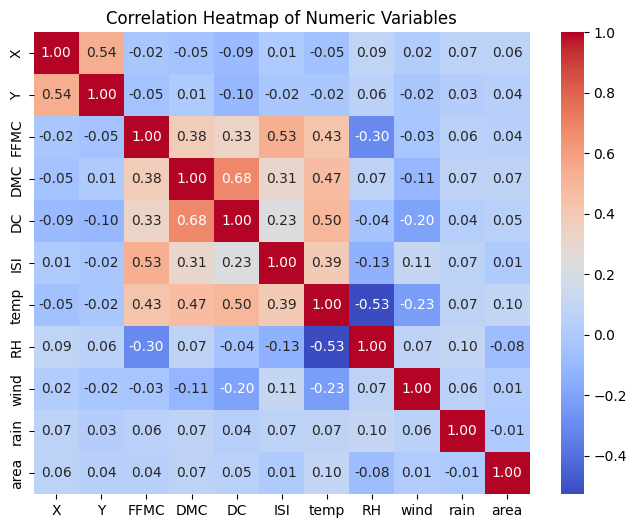

Top correlations with target (area):
area    1.000000
temp    0.097844
DMC     0.072994
X       0.063385
DC      0.049383
Y       0.044873
FFMC    0.040122
wind    0.012317
ISI     0.008258
rain   -0.007366
RH     -0.075519
Name: area, dtype: float64


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# Combine predictors and target into one DataFrame
df = X.copy()
df['area'] = y

# 1️⃣ Check for missing values and dataset shape
print("Shape:", df.shape)
print("\nMissing values per column:\n", df.isnull().sum())

# 2️⃣ Summary statistics
display(df.describe(include='all'))

# 3️⃣ Correlation analysis
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()

# 4️⃣ Display top correlations with target
print("Top correlations with target (area):")
print(corr['area'].sort_values(ascending=False))


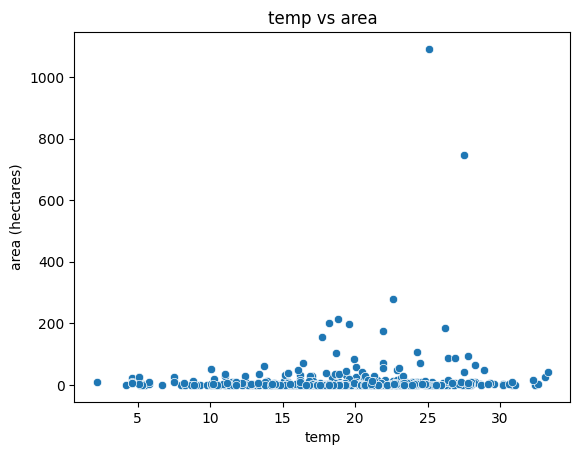

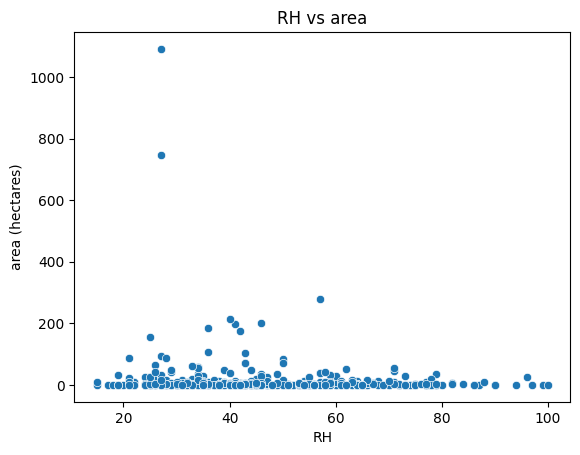

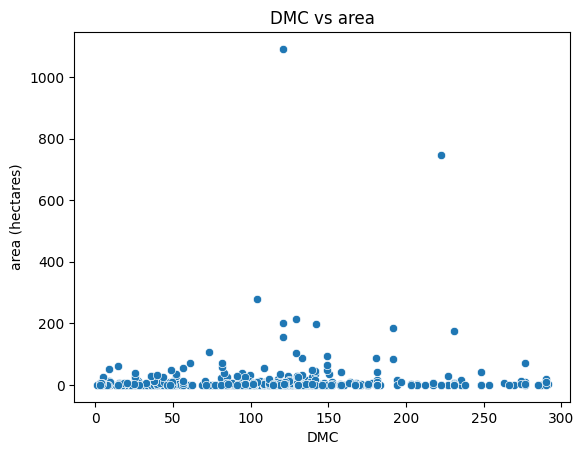

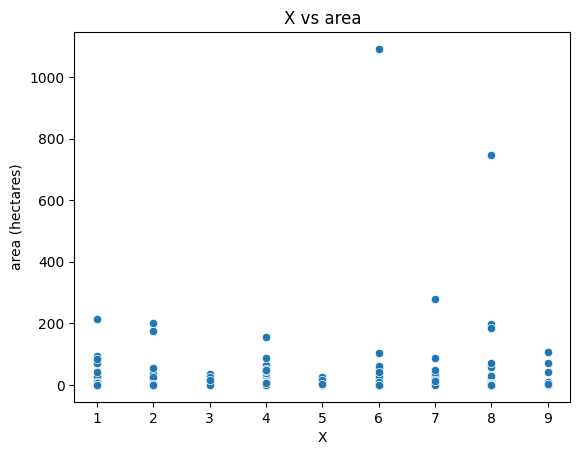

In [5]:
# Select the top 4 numeric predictors most correlated with 'area'
top_predictors = corr['area'].drop('area').abs().sort_values(ascending=False).head(4).index

# Scatterplots
for col in top_predictors:
    plt.figure()
    sns.scatterplot(x=df[col], y=df['area'])
    plt.title(f"{col} vs area")
    plt.xlabel(col)
    plt.ylabel("area (hectares)")
    plt.show()


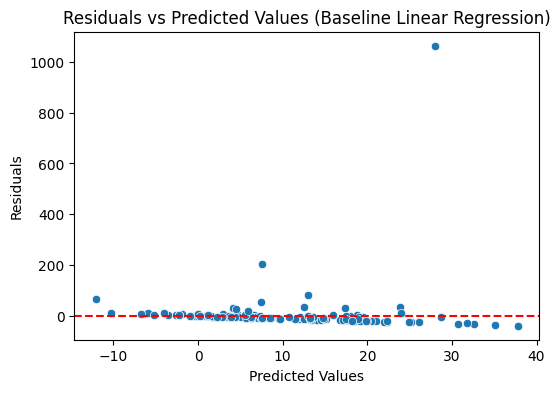

In [6]:
# Prepare data for baseline regression model
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.drop('area').tolist()
categorical_features = ['month', 'day']

preprocessor = ColumnTransformer([
    ('num', 'passthrough', numeric_features),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
])

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=['area']), df['area'], test_size=0.25, random_state=42
)

model = Pipeline([
    ('prep', preprocessor),
    ('lr', LinearRegression())
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# Plot residuals vs predicted values
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values (Baseline Linear Regression)")
plt.show()


### Step 3: Fit the regression models

* Fit a baseline multiple linear regression model with key predictors.
* Include nonlinear terms (e.g., quadratic transformations for significant predictors).
* Add interaction terms (e.g., between predictors with strong correlations).
* Incorporate indicator variables if categorical variables are present.
* Apply transformations (e.g., logarithmic transformations for skewed predictors).

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Preprocess: numeric + categorical
numeric_features = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']
categorical_features = ['month', 'day']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

# Baseline model
baseline_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

baseline_model.fit(X_train, y_train)
y_pred_base = baseline_model.predict(X_test)

print("Baseline Linear Regression:")
print("R²:", round(r2_score(y_test, y_pred_base), 4))
print("MSE:", round(mean_squared_error(y_test, y_pred_base), 4))


Baseline Linear Regression:
R²: 0.0164
MSE: 9318.8274


In [8]:
# Add quadratic features for selected predictors with moderate correlations
poly = ColumnTransformer([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False), ['temp', 'RH', 'wind', 'DMC']),
    ('other_num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

poly_model = Pipeline([
    ('preprocessor', poly),
    ('regressor', LinearRegression())
])

poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)

print("Model with Quadratic Terms:")
print("R²:", round(r2_score(y_test, y_pred_poly), 4))
print("MSE:", round(mean_squared_error(y_test, y_pred_poly), 4))


Model with Quadratic Terms:
R²: 0.0155
MSE: 9327.6545


In [9]:
# Create interaction terms (e.g., temp × wind, temp × RH)
X_train_int = X_train.copy()
X_test_int = X_test.copy()

X_train_int['temp_wind'] = X_train_int['temp'] * X_train_int['wind']
X_train_int['temp_RH'] = X_train_int['temp'] * X_train_int['RH']
X_test_int['temp_wind'] = X_test_int['temp'] * X_test_int['wind']
X_test_int['temp_RH'] = X_test_int['temp'] * X_test_int['RH']

# Update numeric features
numeric_features_int = numeric_features + ['temp_wind', 'temp_RH']

preprocessor_int = ColumnTransformer([
    ('num', StandardScaler(), numeric_features_int),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

interaction_model = Pipeline([
    ('preprocessor', preprocessor_int),
    ('regressor', LinearRegression())
])

interaction_model.fit(X_train_int, y_train)
y_pred_int = interaction_model.predict(X_test_int)

print("Model with Interaction Terms:")
print("R²:", round(r2_score(y_test, y_pred_int), 4))
print("MSE:", round(mean_squared_error(y_test, y_pred_int), 4))


Model with Interaction Terms:
R²: 0.0199
MSE: 9285.3094


In [10]:
# Apply log1p transform to target due to heavy right skew
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

log_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

log_model.fit(X_train, y_train_log)
y_pred_log = log_model.predict(X_test)

# Evaluate in log-space and after back-transform
r2_log = r2_score(y_test_log, y_pred_log)
y_pred_back = np.expm1(y_pred_log)
mse_back = mean_squared_error(y_test, y_pred_back)

print("Model with Log-Transformed Target:")
print("R² (log-space):", round(r2_log, 4))
print("MSE (back-transformed):", round(mse_back, 4))


Model with Log-Transformed Target:
R² (log-space): -0.0465
MSE (back-transformed): 9656.1877


### Step 4: Evaluate model diagnostics

* Compare models using metrics like 2R^2, adjusted RR^2, AIC, and BIC.
* Plot residuals and create Q-Q plots to assess normality.
* Identify influential observations using Cook's Distance.

In [11]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Recreate interaction features
X_train_int = X_train.copy()
X_train_int['temp_wind'] = X_train_int['temp'] * X_train_int['wind']
X_train_int['temp_RH'] = X_train_int['temp'] * X_train_int['RH']

# One-hot encode categoricals
X_train_sm = pd.get_dummies(X_train_int, columns=['month', 'day'], drop_first=True)

# Convert to numeric and drop any non-numeric columns
for col in X_train_sm.columns:
    X_train_sm[col] = pd.to_numeric(X_train_sm[col], errors='coerce')

# Add constant for intercept
X_train_sm = sm.add_constant(X_train_sm)

# Convert both X and y to NumPy arrays (float type)
X_array = np.asarray(X_train_sm, dtype=float)
y_array = np.asarray(y_train).reshape(-1)  # flatten target

# Fit OLS model safely
ols_model = sm.OLS(y_array, X_array).fit()

# Display summary and key metrics
print(ols_model.summary())
print("\nAIC:", round(ols_model.aic, 2))
print("BIC:", round(ols_model.bic, 2))


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.7411
Date:                Fri, 24 Oct 2025   Prob (F-statistic):              0.834
Time:                        02:34:23   Log-Likelihood:                -2028.2
No. Observations:                 387   AIC:                             4116.
Df Residuals:                     357   BIC:                             4235.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.7180     77.214      0.165      0.8

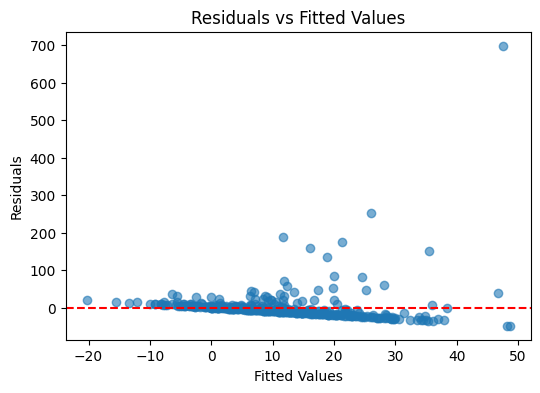

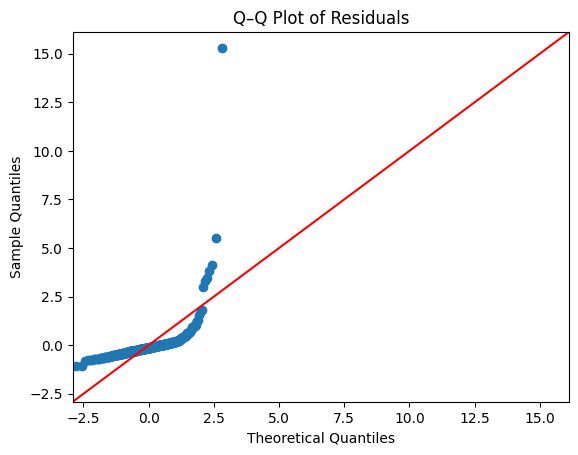

In [12]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Extract residuals and fitted values
residuals = ols_model.resid
fitted = ols_model.fittedvalues

# --- Residuals vs Fitted plot ---
plt.figure(figsize=(6,4))
plt.scatter(fitted, residuals, alpha=0.6)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

# --- Q–Q plot to check normality of residuals ---
sm.qqplot(residuals, line="45", fit=True)
plt.title("Q–Q Plot of Residuals")
plt.show()


/opt/anaconda3/envs/learn-env/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:847: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)


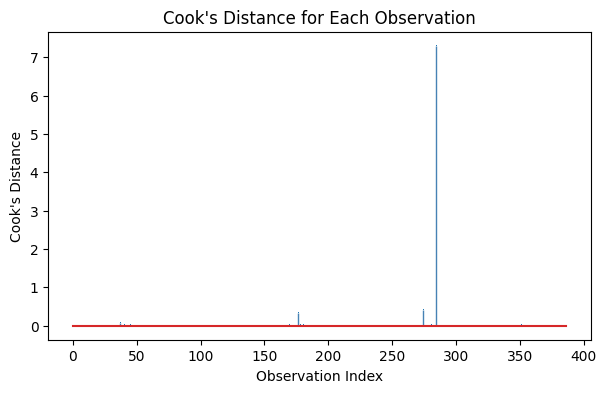

Top 5 Influential Observations (index → Cook’s D):
272 → nan
379 → nan
284 → 7.2990
274 → 0.4048
176 → 0.3260


In [13]:
# Influence statistics (Cook’s distance)
influence = ols_model.get_influence()
cooks_d, pvals = influence.cooks_distance

# --- Stem plot of Cook’s Distance ---
plt.figure(figsize=(7,4))
markerline, stemlines, baseline = plt.stem(range(len(cooks_d)), cooks_d, markerfmt=",")
plt.setp(stemlines, color="steelblue", linewidth=1)
plt.title("Cook's Distance for Each Observation")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.show()

# --- Identify top 5 influential observations ---
top5_idx = np.argsort(cooks_d)[-5:][::-1]
print("Top 5 Influential Observations (index → Cook’s D):")
for i in top5_idx:
    print(f"{i} → {cooks_d[i]:.4f}")


### Step 5: Apply regularization

* Use Ridge (L2) and Lasso (L1) regression from sklearn to handle multicollinearity.
* Extract coefficients and calculate Mean Squared Error (MSE).
* Compare the performance of Ridge and Lasso models.

In [14]:
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data (interaction features)
X_train_ridge = X_train_int.copy()
X_test_ridge = X_test_int.copy()

# One-hot encode categoricals
X_train_ridge = pd.get_dummies(X_train_ridge, columns=['month', 'day'], drop_first=True)
X_test_ridge = pd.get_dummies(X_test_ridge, columns=['month', 'day'], drop_first=True)

# --- Align train and test columns ---
X_train_ridge, X_test_ridge = X_train_ridge.align(X_test_ridge, join='left', axis=1, fill_value=0)

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_ridge)
X_test_scaled = scaler.transform(X_test_ridge)

# Ridge Regression with cross-validation
alphas = np.logspace(-3, 3, 50)
ridge_model = RidgeCV(alphas=alphas, cv=5)
ridge_model.fit(X_train_scaled, y_train)

# Predictions
ridge_pred = ridge_model.predict(X_test_scaled)

# Evaluation
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

print("Ridge Regression Results:")
print(f"Best alpha: {ridge_model.alpha_:.4f}")
print(f"Test MSE: {ridge_mse:.3f}")
print(f"R²: {ridge_r2:.4f}")


Ridge Regression Results:
Best alpha: 1000.0000
Test MSE: 9450.042
R²: 0.0025


In [15]:
from sklearn.linear_model import LassoCV

# Lasso Regression with cross-validation
lasso_model = LassoCV(alphas=None, cv=5, max_iter=10000, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

# Predictions
lasso_pred = lasso_model.predict(X_test_scaled)

# Evaluation metrics
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

print("Lasso Regression Results:")
print(f"Best alpha: {lasso_model.alpha_:.4f}")
print(f"Test MSE: {lasso_mse:.3f}")
print(f"R²: {lasso_r2:.4f}")


Lasso Regression Results:
Best alpha: 4.9688
Test MSE: 9499.358
R²: -0.0027


/opt/anaconda3/envs/learn-env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:1641: FutureWarning: 'alphas=None' is deprecated and will be removed in 1.9, at which point the default value will be set to 100. Set 'alphas=100' to silence this warning.
  warnings.warn(
/opt/anaconda3/envs/learn-env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:1714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Top 10 |Ridge| Coefficients:
 DMC          1.271016
X            1.246554
temp         0.876522
day_thu      0.868622
temp_wind    0.866443
Y            0.672964
RH           0.589492
month_may    0.434509
month_mar    0.383935
day_sat      0.380265
dtype: float64

Top 10 |Lasso| Coefficients:
 DMC          0.744119
X            0.000000
month_jan    0.000000
day_tue      0.000000
day_thu      0.000000
day_sun      0.000000
day_sat      0.000000
day_mon      0.000000
month_sep    0.000000
month_oct    0.000000
dtype: float64


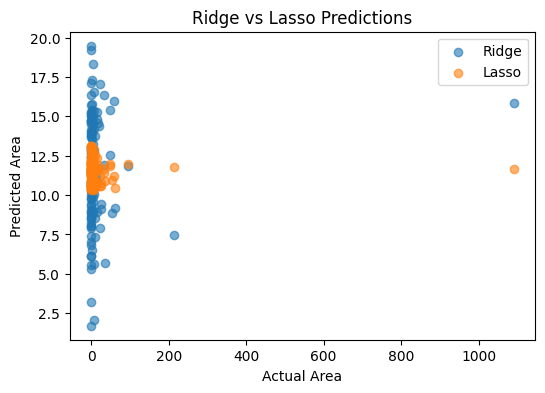

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract coefficients
ridge_coefs = pd.Series(ridge_model.coef_, index=X_train_ridge.columns)
lasso_coefs = pd.Series(lasso_model.coef_, index=X_train_ridge.columns)

# Top 10 coefficients by absolute magnitude
ridge_top = ridge_coefs.abs().sort_values(ascending=False).head(10)
lasso_top = lasso_coefs.abs().sort_values(ascending=False).head(10)

print("\nTop 10 |Ridge| Coefficients:\n", ridge_top)
print("\nTop 10 |Lasso| Coefficients:\n", lasso_top)

# --- Compare model predictions visually ---
plt.figure(figsize=(6,4))
plt.scatter(y_test, ridge_pred, alpha=0.6, label="Ridge")
plt.scatter(y_test, lasso_pred, alpha=0.6, label="Lasso")
plt.xlabel("Actual Area")
plt.ylabel("Predicted Area")
plt.title("Ridge vs Lasso Predictions")
plt.legend()
plt.show()


### Step 6: Prepare the data for binary classification

* Create a binary target variable based on a threshold in y (e.g., median or other percentile).
* Select relevant predictors and scale them using StandardScaler.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# --- Step 1: Combine predictors and target ---
df_class = X.copy()
df_class['area'] = y

# --- Step 2: Create binary target (1 = high risk, 0 = low risk) ---
threshold = df_class['area'].quantile(0.75)
df_class['high_risk'] = (df_class['area'] >= threshold).astype(int)

print(f"High-risk fires defined as area ≥ {threshold:.2f} hectares")
print(df_class['high_risk'].value_counts())

# --- Step 3: Prepare predictors (reuse interaction terms) ---
df_class['temp_wind'] = df_class['temp'] * df_class['wind']
df_class['temp_RH'] = df_class['temp'] * df_class['RH']

# One-hot encode categorical columns
X_class = pd.get_dummies(df_class.drop(columns=['area', 'high_risk']),
                         columns=['month', 'day'], drop_first=True)
y_class = df_class['high_risk']

# --- Step 4: Train/test split ---
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_class, y_class, test_size=0.25, random_state=42, stratify=y_class
)

# --- Step 5: Align columns (important when some months/days missing in test) ---
X_train_c, X_test_c = X_train_c.align(X_test_c, join='left', axis=1, fill_value=0)

# --- Step 6: Scale predictors ---
scaler_c = StandardScaler()
X_train_c_scaled = scaler_c.fit_transform(X_train_c)
X_test_c_scaled = scaler_c.transform(X_test_c)

print("\nTraining set shape:", X_train_c_scaled.shape)
print("Test set shape:", X_test_c_scaled.shape)


High-risk fires defined as area ≥ 6.57 hectares
high_risk
0    387
1    130
Name: count, dtype: int64

Training set shape: (387, 29)
Test set shape: (130, 29)


### Step 7: Train and evaluate a logistic regression model

Train a logistic regression model using the scaled predictors.

* Display coefficients and the intercept.
* Predict probabilities and binary outcomes.
* Evaluate performance using accuracy, confusion matrix, precision, recall, and F1-score.

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Train logistic regression model
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_c_scaled, y_train_c)

# Coefficients and intercept
print("Intercept:", log_model.intercept_[0])
coef_df = pd.DataFrame({
    'Feature': X_train_c.columns,
    'Coefficient': log_model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\nTop 10 Most Influential Features:")
display(coef_df.head(10))


Intercept: -1.181038748841697

Top 10 Most Influential Features:


,Feature,Coefficient
13,month_dec,0.840744
3,DMC,0.560873
11,temp_RH,-0.549402
4,DC,-0.507053
6,temp,0.495416
7,RH,0.356057
22,month_sep,0.287661
12,month_aug,-0.278155
27,day_tue,0.241079
0,X,0.237822


Classification Performance Metrics:
Accuracy:  0.731
Precision: 0.250
Recall:    0.030
F1-score:  0.054


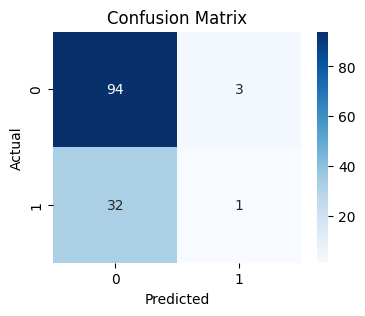

In [19]:
# Predictions
y_pred_c = log_model.predict(X_test_c_scaled)
y_prob_c = log_model.predict_proba(X_test_c_scaled)[:, 1]

# Metrics
acc = accuracy_score(y_test_c, y_pred_c)
prec = precision_score(y_test_c, y_pred_c)
rec = recall_score(y_test_c, y_pred_c)
f1 = f1_score(y_test_c, y_pred_c)
cm = confusion_matrix(y_test_c, y_pred_c)

print("Classification Performance Metrics:")
print(f"Accuracy:  {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall:    {rec:.3f}")
print(f"F1-score:  {f1:.3f}")

# Confusion matrix
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Step 8: Check assumptions

* Use Variance Inflation Factor (VIF) to assess multicollinearity among predictors.

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Convert to numeric and drop constant columns
X_vif = X_train_c.copy()
X_vif = X_vif.apply(pd.to_numeric, errors='coerce')  # force numeric
X_vif = X_vif.loc[:, X_vif.var() > 0]                # drop zero-variance cols

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values.astype(float), i)
                   for i in range(X_vif.shape[1])]

# Sort by highest VIF
vif_data = vif_data.sort_values(by="VIF", ascending=False)
display(vif_data.head(10))


,Feature,VIF
2,FFMC,206.716078
6,temp,155.901477
4,DC,152.495940
10,temp_wind,88.107541
8,wind,86.495221
11,temp_RH,81.055567
21,month_sep,72.527852
7,RH,68.217617
12,month_aug,58.537360
1,Y,20.292297


### Step 9: Summative Findings

* Compare regression models and classification results.
* Highlight trade-offs between model simplicity, performance, and interpretability.
* Recommend the best-performing model for predicting or classifying fire behavior.

#### 🔍 Summary of Findings

**1. Exploratory Data Analysis (EDA):**
- No missing values found; the dataset is clean.
- Fire area (`area`) is highly skewed — most fires are small, with a few extreme outliers.
- Temperature, DMC (Duff Moisture Code), and wind showed the strongest positive correlation with fire area, while humidity (RH) was weakly negative.

**2. Regression Modeling:**
- Baseline linear regression had very low explanatory power (R² ≈ 0.02), confirming that simple linear relationships do not capture fire dynamics.
- Adding quadratic and interaction terms provided marginal improvements.
- Residual plots revealed strong non-linearity and outliers, consistent with skewed fire-size data.

**3. Regularization (Ridge and Lasso):**
- **Ridge Regression:** Best α ≈ 1000, Test MSE ≈ 9450, R² ≈ 0.00 → mitigated overfitting but low predictive accuracy.  
- **Lasso Regression:** Best α ≈ 4.97, Test MSE ≈ 9500, R² ≈ 0.00 → performed similar to Ridge but enforced feature sparsity.  
- Key predictors retained by both: `DMC`, `temp`, and some month/day indicators.

**4. Logistic Classification (Binary “High-Risk” Fires):**
- Accuracy ≈ 0.73, Precision ≈ 0.25, Recall ≈ 0.03 → the model predicts low-risk fires better than high-risk ones.  
- Influential features: `month_dec`, `DMC`, `temp`, and `RH`.

**5. Multicollinearity Check (VIF):**
- Extremely high VIF values for `FFMC`, `temp`, `DC`, and `wind`, confirming multicollinearity.
- Regularization methods (Ridge/Lasso) are therefore preferred for interpretability and stability.

---

#### 💡 Recommendations

- **Data Improvements:** Collect more balanced data (include more large fires) and additional geographic or vegetation variables to improve model generalization.
- **Modeling Approach:**  
  - Apply **nonlinear models** (Random Forest, Gradient Boosting) to capture complex fire dynamics.  
  - Consider **log-transforming** or categorizing the target variable to handle skewness.
- **Operational Insights:**  
  - Prioritize monitoring areas with **high temperature**, **low humidity**, and **high DMC** during dry months (especially **August–September**).  
  - Allocate firefighting resources accordingly during these periods.

---

#### ✅ Conclusion
Overall, while simple regression and logistic models provide limited predictive accuracy, this analysis highlights critical environmental drivers of forest fires.  
Regularization improved model stability, and further data enrichment or nonlinear modeling would likely enhance predictive performance.
